<a href="https://colab.research.google.com/github/Chromathiccc/Colab_notebooks/blob/main/LoL_first_10_min_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# import required variables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn for ML models
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [20]:
df = pd.read_csv('/content/drive/MyDrive/csv/high_diamond_ranked_10min.csv')
df.head()



,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [21]:
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [22]:
print (f'The Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The Dataset has 9879 rows and 40 columns


In [23]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [24]:
# Copy of the original dataset for trimming of unneeded values
df2 = df.copy()
df2.drop(['gameId', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin', 
          'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin','redGoldDiff', 'redExperienceDiff'], axis = 1, inplace = True)

df2.head(10)

,blueWins,blueEliteMonsters,blueDragons,blueHeralds,blueGoldDiff,blueExperienceDiff,redEliteMonsters,redDragons,redHeralds
0,0,0,0,0,643,-8,0,0,0
1,0,0,0,0,-2908,-1173,2,1,1
2,0,1,1,0,-1172,-1033,0,0,0
3,0,1,0,1,-1321,-7,0,0,0
4,0,0,0,0,-1004,230,1,1,0
5,1,1,1,0,698,101,0,0,0
6,1,1,1,0,2411,1563,0,0,0
7,0,0,0,0,-2615,-800,1,1,0
8,0,0,0,0,-1979,-771,2,1,1
9,1,1,1,0,-1548,-1574,0,0,0


In [25]:
def findDifference (blueValue, redValue):
  return blueValue - redValue

for i in df.columns:
  

SyntaxError: ignored

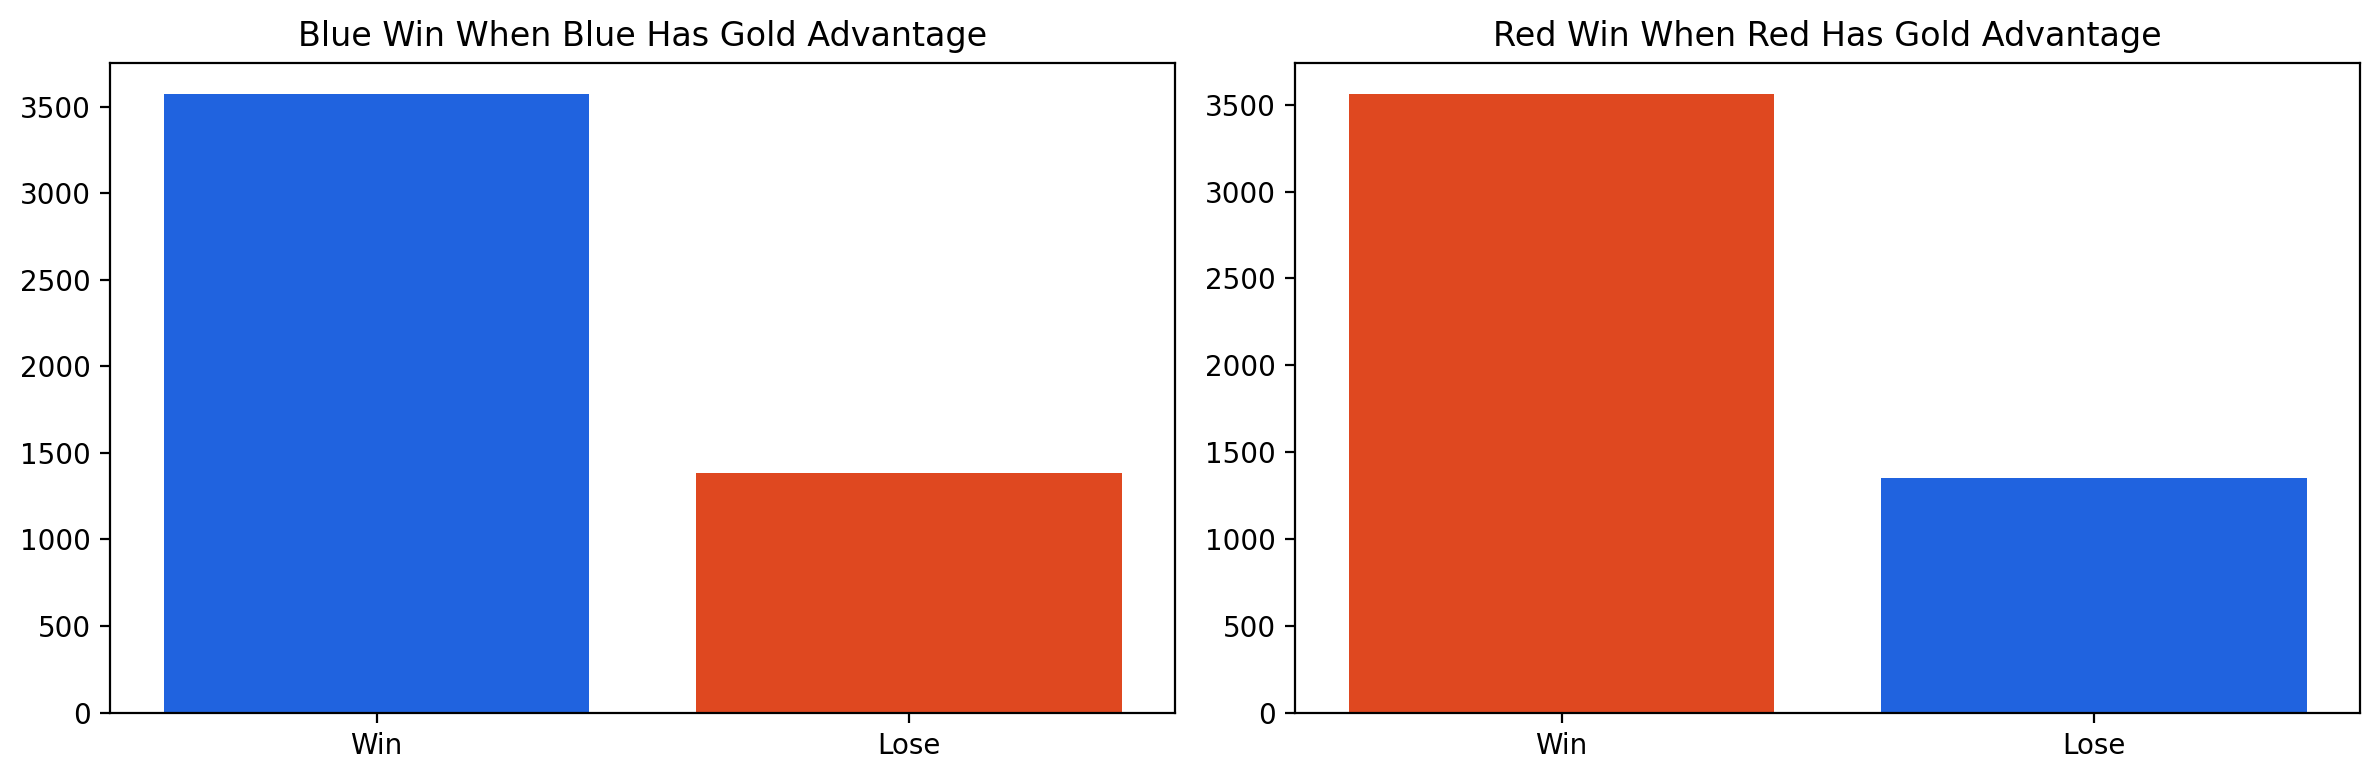

In [27]:
# https://www.kaggle.com/code/emresengul/exploratory-data-analysis-on-league-of-legends

palette=['#FF3500',"#0059FF"]
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.barplot(x=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().index, y=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().values, ax=ax[0], palette=palette[::-1])
sns.barplot(x=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().index, y=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().values, ax=ax[1], palette=palette)

ax[0].set_title("Blue Win When Blue Has Gold Advantage")
ax[1].set_title("Red Win When Red Has Gold Advantage")

plt.tight_layout()

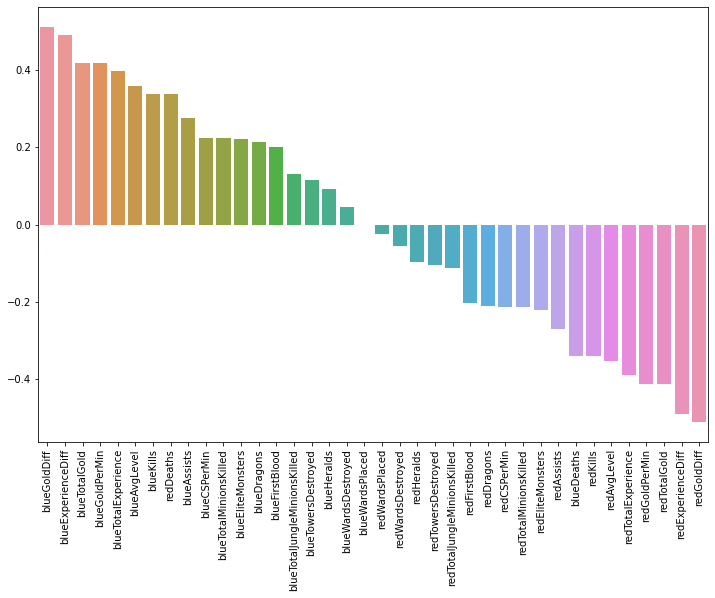

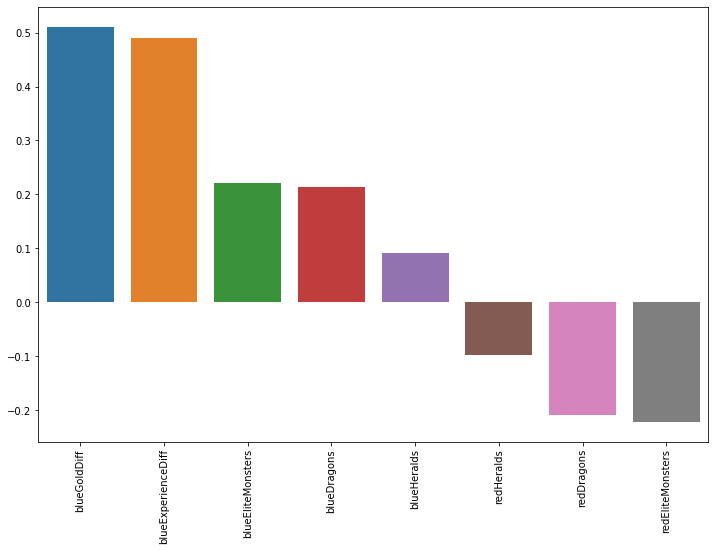

In [41]:
corr = df.corr()["blueWins"].sort_values(ascending=False).drop(["blueWins","gameId"])

plt.figure(figsize=(12,8))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation = 90);

corr = df2.corr()["blueWins"].sort_values(ascending=False).drop(["blueWins"])

plt.figure(figsize=(12,8))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation = 90);